In [127]:
!pip install opencv-python

In [129]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

## Image Preprocessing

reading images using opencv and generating the shape of the rgb image having 3 dimensions

In [254]:
img=cv2.imread('./test_images/viratkohli1.jpg')
img.shape

(1038, 1600, 3)

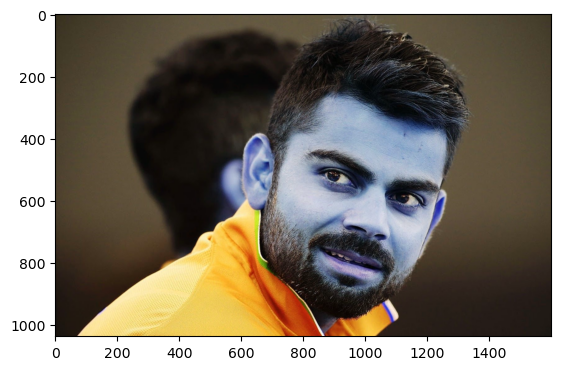

In [256]:
plt.imshow(img)

The above is an RGB image. To convert it to grayscale, we use the following method.

In [258]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(1038, 1600)

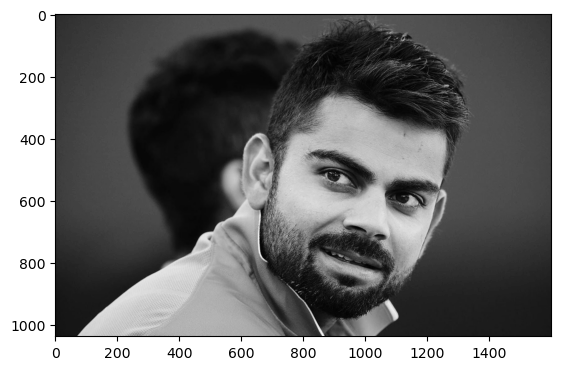

In [260]:
plt.imshow(gray,cmap='gray')

In [262]:
gray

array([[44, 44, 44, ..., 52, 52, 52],
       [44, 44, 44, ..., 52, 52, 52],
       [44, 44, 44, ..., 52, 52, 52],
       ...,
       [19, 19, 19, ..., 23, 23, 23],
       [19, 19, 19, ..., 23, 23, 23],
       [19, 19, 19, ..., 23, 23, 23]], dtype=uint8)

Face detection using Haar Cascades

In [265]:
face_cascade=cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[670, 285, 671, 671]])

The `faces` variable provides four values: `x`, `y`, `width`, and `height` of the face.

In [268]:
(x,y,w,h)=faces[0]
x,y,w,h

(670, 285, 671, 671)

In [270]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

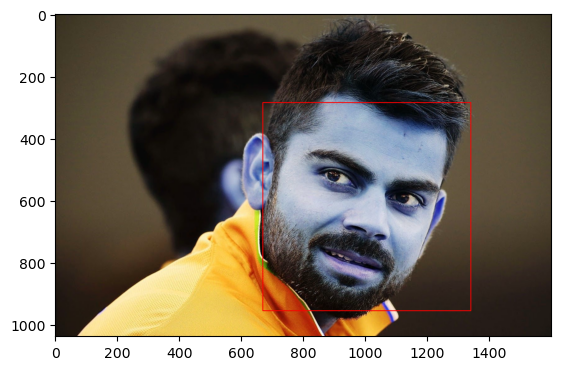

In [272]:
plt.imshow(face_img)

In [274]:
cv2.destroyAllWindows()

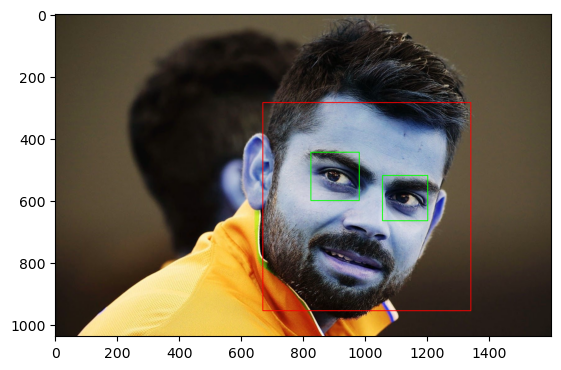

In [276]:
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

roi is the region of interest-> it creates a region of interest image

In [279]:
%matplotlib inline

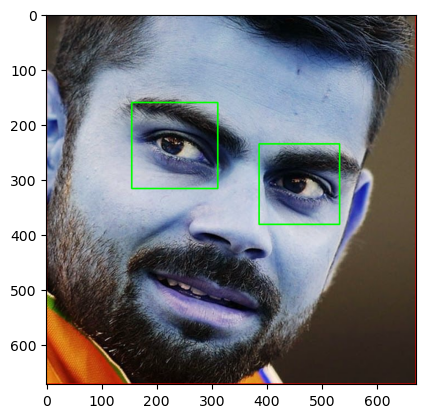

In [281]:
plt.imshow(roi_color,cmap='gray')

We will crop all the images and store the cropped images in a single folder.

In [284]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=face_img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color
    

Above function returns the cropped image

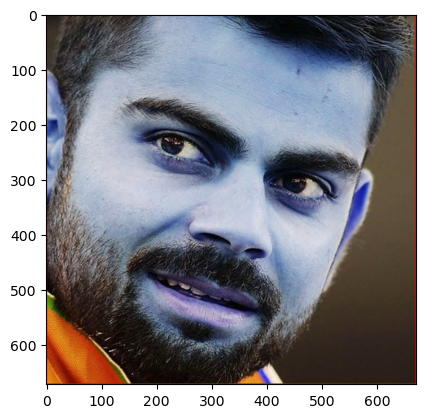

In [289]:
cropped_image=get_cropped_image_if_2_eyes('./test_images/viratkohli1.jpg')
plt.imshow(cropped_image)
plt.show()

In [291]:
def get_cropped_image_if_2_eyes_with_cropped(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=face_img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            for (ex,ey,ew,eh) in eyes:
                    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
            return roi_color

The above function returns the cropped image with labeled eyes.

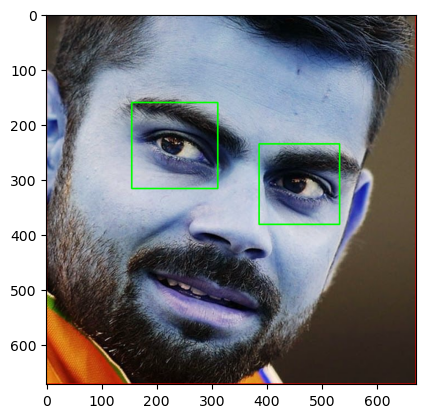

In [296]:
cropped_image=get_cropped_image_if_2_eyes_with_cropped('./test_images/viratkohli1.jpg')
plt.imshow(cropped_image)
plt.show()

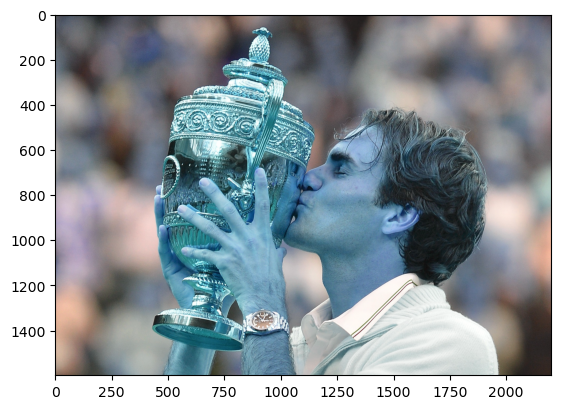

In [298]:
img=cv2.imread('./test_images/rogerfederer.jpg')
plt.imshow(img)

In [325]:
cropped_image_2=get_cropped_image_if_2_eyes('./test_images/rogerfederer.jpg')
cropped_image_2


The function returns `None` if no eyes are detected.

We will now create a `cropped` folder in the current directory, containing all the cropped images. This folder will be created using the OS module.

In [327]:
path_to_data="./dataset/"
path_to_cr_data="./dataset/cropped/"

In [329]:
import os

In [331]:
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [333]:
img_dirs

['./dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

If a folder does not exist, I will create it using the following method.

In [336]:
import shutil
if os.path.exists(path_to_cr_data):
    # the below method removes if the folder exists
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data) 
# this method creates new folder

In [338]:
img_dirs

['./dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [340]:
# iterating through image directory
cropped_image_dirs=[]
celebrity_file_names_dict={}
for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split('/')[-1]
    print(celebrity_name)
    celebrity_file_names_dict[celebrity_name]=[]
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("generating cropped Images:",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            # roi color image will be saved in the above path this can be done using opencv shown below
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count+=1

lionel_messi
generating cropped Images: ./dataset/cropped/lionel_messi
maria_sharapova
generating cropped Images: ./dataset/cropped/maria_sharapova
roger_federer
generating cropped Images: ./dataset/cropped/roger_federer
serena_williams
generating cropped Images: ./dataset/cropped/serena_williams
virat_kohli
generating cropped Images: ./dataset/cropped/virat_kohli


## Feature Engineering

Feature engineering using wavelet transformation involves creating a black-and-white image to extract important features.

In [356]:
!pip install PyWavelets

In [357]:
import numpy as np
import pywt
import cv2
def w2d(img,mode='haar',level=1):
    imArray=img
    # Data type conversions
    # convert to grayscale
    imArray=cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    # convert to float
    imArray=np.float32(imArray)
    imArray/=255
    # compute coefficients
    coeffs=pywt.wavedec2(imArray,mode,level=level)
    # process coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0]*=0
    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H,mode)
    imArray_H*=255
    imArray_H=np.uint8(imArray_H)
    return imArray_H

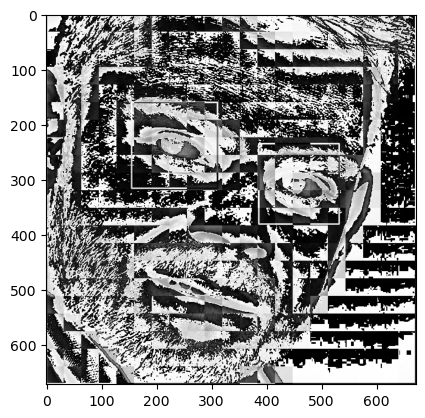

In [360]:
im_har=w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [362]:
celebrity_file_names_dict

{'lionel_messi': ['./dataset/cropped/lionel_messi/lionel_messi1.png',
  './dataset/cropped/lionel_messi/lionel_messi2.png',
  './dataset/cropped/lionel_messi/lionel_messi3.png',
  './dataset/cropped/lionel_messi/lionel_messi4.png',
  './dataset/cropped/lionel_messi/lionel_messi5.png',
  './dataset/cropped/lionel_messi/lionel_messi6.png',
  './dataset/cropped/lionel_messi/lionel_messi7.png',
  './dataset/cropped/lionel_messi/lionel_messi8.png',
  './dataset/cropped/lionel_messi/lionel_messi9.png',
  './dataset/cropped/lionel_messi/lionel_messi10.png',
  './dataset/cropped/lionel_messi/lionel_messi11.png',
  './dataset/cropped/lionel_messi/lionel_messi12.png',
  './dataset/cropped/lionel_messi/lionel_messi13.png',
  './dataset/cropped/lionel_messi/lionel_messi14.png',
  './dataset/cropped/lionel_messi/lionel_messi15.png',
  './dataset/cropped/lionel_messi/lionel_messi16.png',
  './dataset/cropped/lionel_messi/lionel_messi17.png',
  './dataset/cropped/lionel_messi/lionel_messi18.png',
  '

In [364]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [366]:
X=[]
y=[]
for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        # vertically stacking raw and wavelet image
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 
        
    

In [368]:
len(X[0])


4096

In [370]:
X=np.array(X).reshape(len(X),4096).astype(float)

In [372]:
X.shape


(166, 4096)

Data Cleaning Process is done. Now we are ready to Train the model

## Training the model

First we will use SVM with rbf kernel tuned with heuristic finetuning

In [377]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [379]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8571428571428571

In [381]:
len(X_test)


42

In [383]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       1.00      0.78      0.88         9
           2       0.50      1.00      0.67         4
           3       0.75      0.86      0.80         7
           4       1.00      0.93      0.97        15

    accuracy                           0.86        42
   macro avg       0.85      0.86      0.83        42
weighted avg       0.91      0.86      0.87        42



Grid search CV is used to hypertune the parameters

In [386]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [388]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [390]:

scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.839667,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.628667,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.847667,{'logisticregression__C': 1}


In [391]:

best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [392]:
best_estimators['svm'].score(X_test,y_test)

0.8333333333333334

In [393]:
best_estimators['random_forest'].score(X_test,y_test)

0.6666666666666666

In [398]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7619047619047619

In [400]:
best_clf = best_estimators['svm']

In [402]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 5,  1,  0,  1,  0],
       [ 0,  8,  0,  1,  0],
       [ 0,  1,  3,  0,  0],
       [ 0,  0,  1,  6,  0],
       [ 1,  0,  1,  0, 13]], dtype=int64)

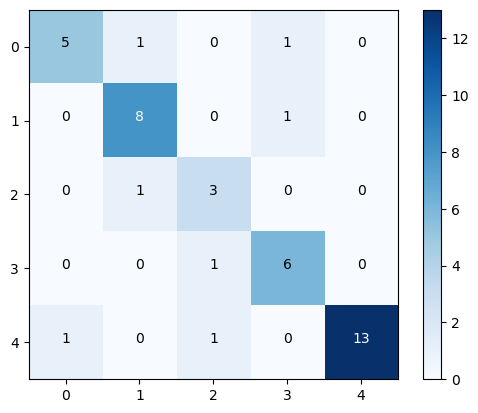

In [404]:
plt.imshow(cm,cmap='Blues')
plt.colorbar()
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm[i, j], horizontalalignment='center', 
             color='white' if cm[i, j] > thresh else 'black')

Saving Our model to the jupyter note book

In [407]:
!pip install joblib

## Saving the Trained Model


In [409]:
import joblib
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']